# SVM

In [60]:
# library
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# data
from sklearn.datasets import load_iris

iris = load_iris()
x = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(int)


In [62]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
# plot
def plot_predictions(model, x, y):
  x1s = np.linspace(x[:, 0].min() - 0.05, x[:, 0].max() + 0.05, 1000)
  x2s = np.linspace(x[:, 1].min() - 0.05, x[:, 1].max() + 0.05, 1000)
  x1, x2 = np.meshgrid(x1s, x2s)

  x_new = np.c_[x1.ravel(), x2.ravel()]

  y_pred = model.predict(x_new).reshape(x1.shape)
  plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)

  y_decision = model.decision_function(x_new).reshape(x1.shape)
  plt.contour(x1, x2, y_decision, colors="k", levels=[-1, 0, 1], linestyles=["--", "-", "--"], alpha=0.8)

  plt.plot(x[y == 0, 0], x[y == 0, 1], "bo", label="Not Iris-Virginica")
  plt.plot(x[y == 1, 0], x[y == 1, 1], "r^", label="Iris-Virginica")
  plt.legend()

  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)

## 1. LinearSVC()

In [64]:
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=1))
])

svm_clf.fit(x, y)
svm_clf["linear_svc"].coef_, svm_clf["linear_svc"].intercept_

/opt/homebrew/Caskroom/miniconda/base/envs/sklearn-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([[1.63336059, 2.38799535]]), array([-2.5053212]))

In [65]:
svm_clf.score(x, y)

0.96

In [66]:
svm_clf.predict([[5.5, 1.7]])

array([1])

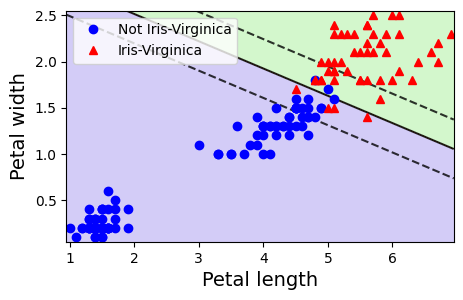

In [67]:
plt.figure(figsize=(5, 3))
plot_predictions(svm_clf, x, y)
plt.show()

## 2. SVC()

In [68]:
from sklearn.svm import SVC

svc_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_svc", SVC(kernel="linear", C=1, random_state=1))
])

svc_clf.fit(x, y)
svc_clf["linear_svc"].coef_, svc_clf["linear_svc"].intercept_

(array([[2.09352075, 2.44252199]]), array([-2.84959514]))

In [69]:
svc_clf.score(x, y)

0.9533333333333334

In [70]:
svc_clf.predict([[5.5, 1.7]])

array([1])

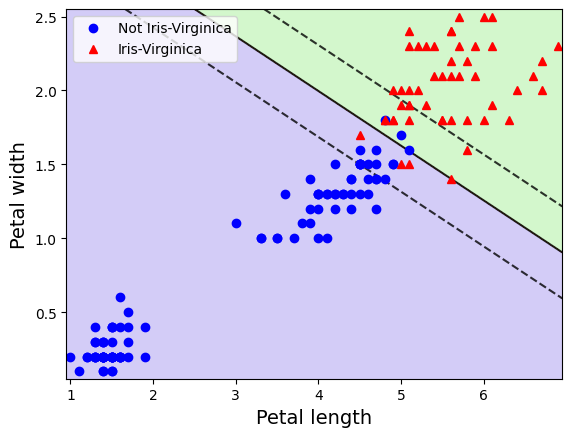

In [71]:
plt.Figure(figsize=(5, 3))
plot_predictions(svc_clf, x, y)
plt.show()

## 3. SGDClassifier()

In [72]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
  ("scaler", StandardScaler()),
  ("linear_svc", SGDClassifier(loss="hinge", alpha=1/(len(y) * 1), random_state=1))
])

sgd_clf.fit(x, y)
sgd_clf["linear_svc"].coef_, sgd_clf["linear_svc"].intercept_

(array([[2.32563254, 2.69470285]]), array([-3.41874739]))

In [73]:
sgd_clf.score(x, y)

0.9666666666666667

In [74]:
sgd_clf.predict([[5.5, 1.7]])

array([1])

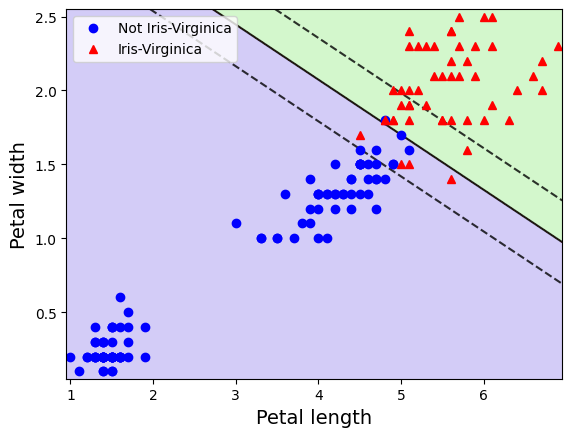

In [75]:
plt.Figure(figsize=(5, 3))
plot_predictions(sgd_clf, x, y)
plt.show()